# Berstein-Vazirani Algorithm
Get the secret number in only one shot.<br>
Classical algorithm needs several tries that equals to the length of secret number.<br>

In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [2]:
secretnumber = '1010'

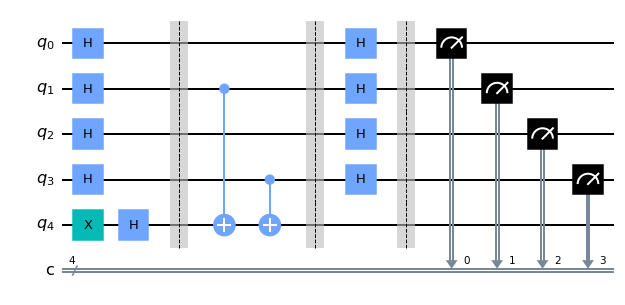

In [3]:
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))

circuit.h(range(len(secretnumber)))

circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()

for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))

circuit.barrier()

circuit.h(range(len(secretnumber)))

circuit.barrier()

circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

circuit.draw(output='mpl')

In [4]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'1010': 1}
